# Importing libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Loading the dataset

In [10]:
df = pd.read_csv("creditcard.csv")

# Displaying the first few rows of the dataset

In [11]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

 

# Checking for missing values

In [12]:
print("Number of missing values in each column:")
print(df.isna().sum())

Number of missing values in each column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


# Checking the class distribution

In [13]:
print("Class distribution:")
print(df['Class'].value_counts())

Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64


# Plotting the class distribution

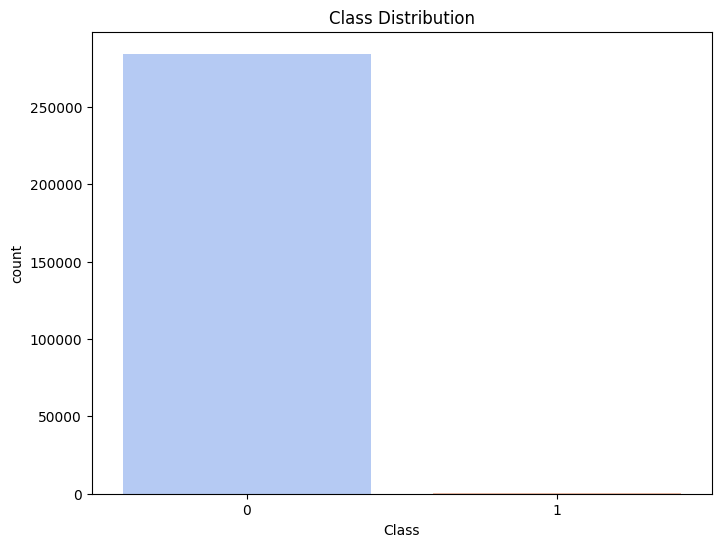

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df, palette='coolwarm')
plt.title('Class Distribution')
plt.show()

# Splitting the data into features and target

In [16]:
X = df.drop('Class', axis=1)
y = df['Class']

# Normalizing the data

In [17]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Using SMOTE (Synthetic Minority Over-sampling Technique)

In [19]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Checking the class distribution after resampling

In [20]:
print("Class distribution after resampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after resampling:
Class
0    227451
1    227451
Name: count, dtype: int64


# Training a logistic regression model

In [21]:
logistic_model = LogisticRegression()
logistic_model.fit(X_resampled, y_resampled)

LogisticRegression()

# Evaluating the model

In [22]:
y_pred = logistic_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.9746146553842913
Precision: 0.058900523560209424
Recall: 0.9183673469387755
F1 Score: 0.11070110701107011


# Plotting the confusion matrix

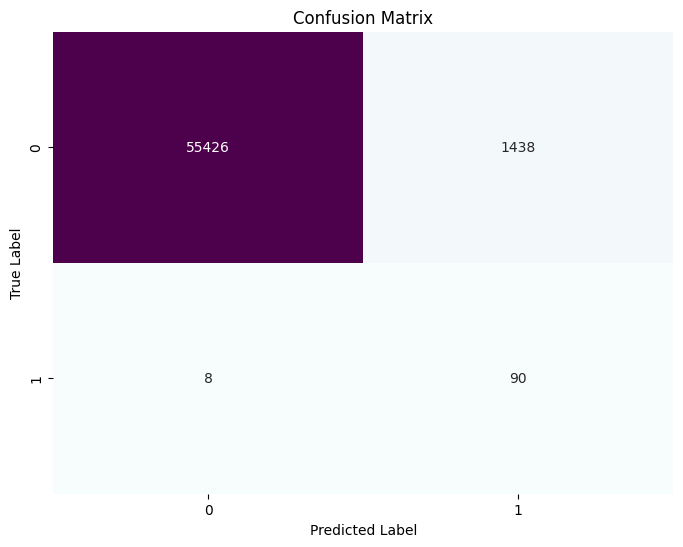

In [23]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="BuPu", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plotting the ROC curve

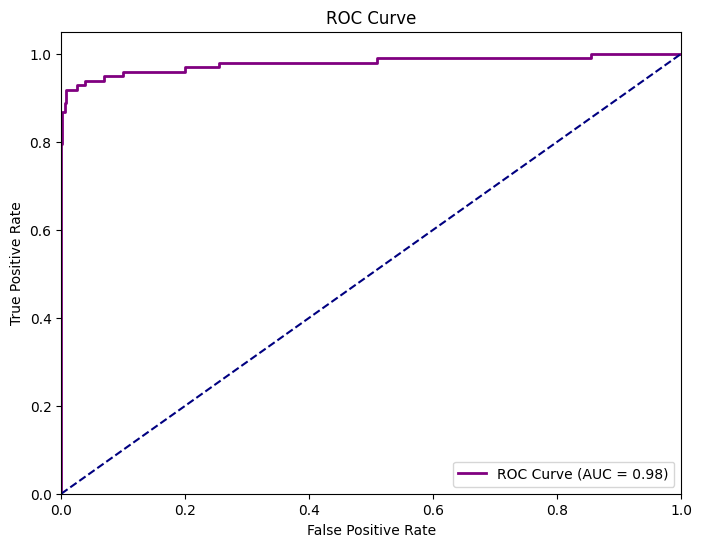

In [24]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, logistic_model.decision_function(X_test))
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='purple', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Plotting the Precision-Recall curve

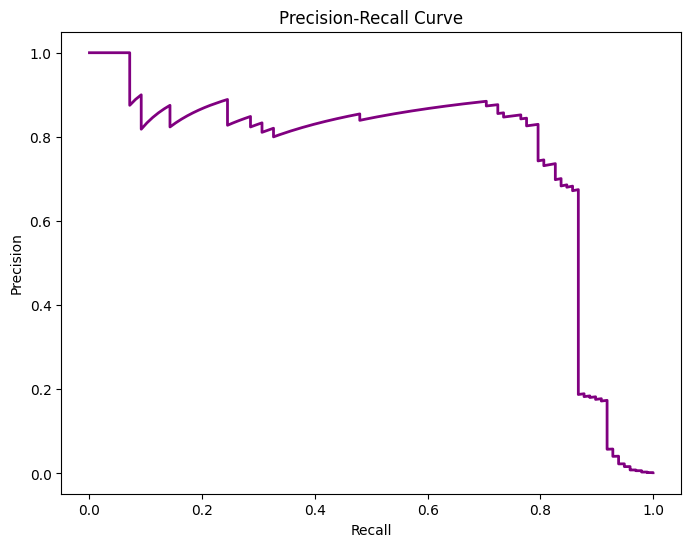

In [25]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, logistic_model.decision_function(X_test))
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Visualizing feature importance

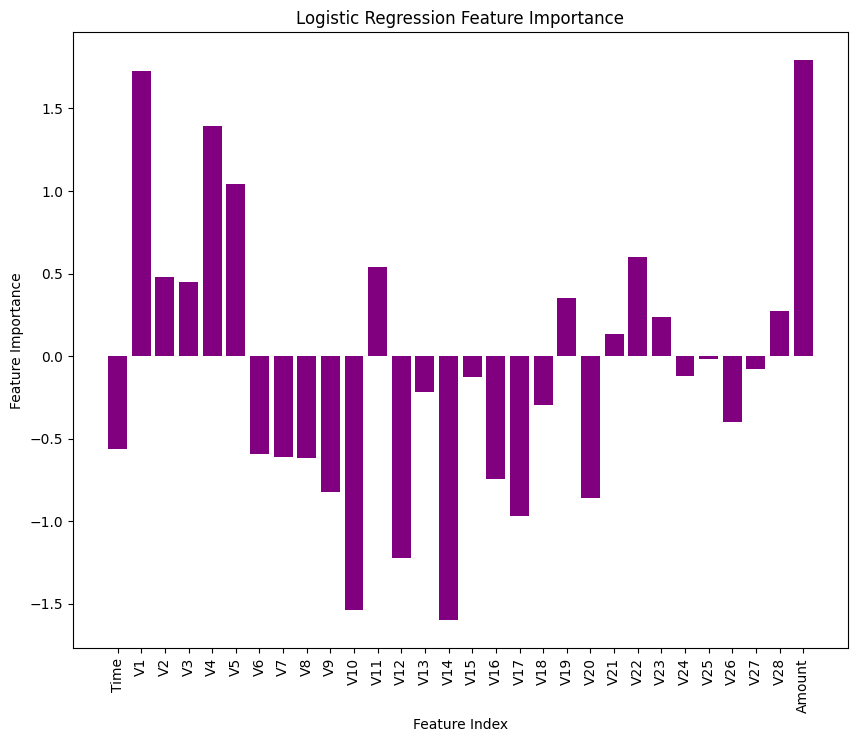

In [26]:
if hasattr(logistic_model, 'coef_'):
    plt.figure(figsize=(10, 8))
    plt.bar(range(len(X.columns)), logistic_model.coef_[0], color='purple')
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Importance')
    plt.title('Logistic Regression Feature Importance')
    plt.xticks(range(len(X.columns)), X.columns, rotation=90)
    plt.show()

# Visualizing data with t-SNE

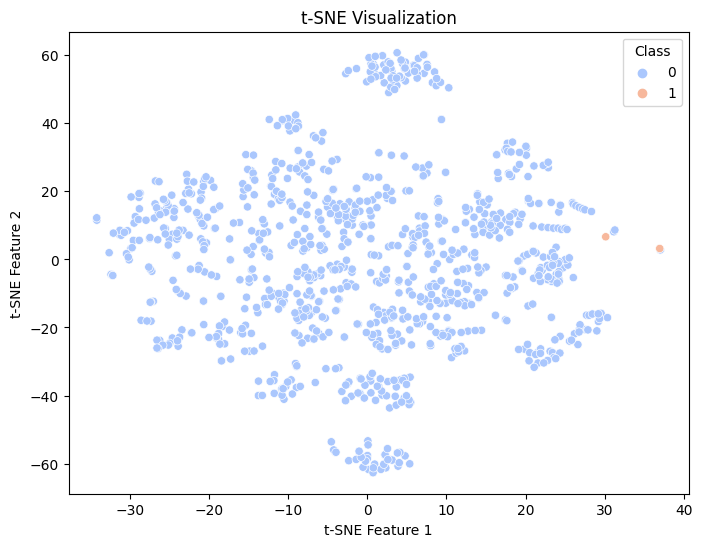

In [27]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_normalized[:1000])  # considering a subset of data for visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y[:1000], palette='coolwarm')
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()